In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive/fashion_mnist") #更改路徑
os.getcwd() #查看當前路徑

'/content/drive/My Drive/fashion_mnist'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn

In [ ]:
### layer def
def InnerProduct_For(x,W,b):
    m=x.shape[0]
    y = np.dot(x,W)
    for i in range(m):
        y[i,:]+b
    return y

def InnerProduct_Back(dEdy,x,W,b):
    dEdx = np.dot(dEdy,(np.transpose(W)))
    dEdw = np.dot((np.transpose(x)),dEdy)
    dEdb = np.dot(np.ones([1,48000]),dEdy)
    return dEdx,dEdw,dEdb

def Softmax_For(x):
    k = x.shape[0]
    softmax = np.ones([x.shape[0],x.shape[1]])
    p = np.max(x,axis=1)
    for i in range(k):
        x[i]=x[i,:]-p[i]
        softmax[i] = np.exp(x[i,:]) / np.sum(np.exp(x[i,:]))
    return softmax


def Softmax_Back(y,t):
    dEdx=y-t
    return dEdx

def Sigmoid_For(x):
    y=np.exp(-x)+1
    k=np.ones((10,1))
    y=np.subtract(k,y)
    return y

def Sigmoid_Back(dEdy,x):
    dEdx = np.multiply(dEdy,(np.exp(-x)/np.square(np.exp(-x)+1)))
    return dEdx

def ReLu_For(x):
    y= np.maximum(0,x)
    return y

def ReLu_Back(dEdy,x):
    x[x<=0]=0
    x[x>0]=1
    dEdx = dEdy*x       
    return dEdx

def loss_For(y,y_pred):
    loss = np.square(y_pred-y).sum()
    return loss

In [ ]:
#設定一些參數
eta =     0.000002 #learning rate
Data_num = 784      #size of input data   (inputlayer)
W1_num = 15         #size of first neural (1st hidden layer)
Out_num = 10        #size of output data  (output layer)
iteration = 6000    #epoch for training   (iteration)
image_num = 60000   #input images
test_num  = 10000   #testing images

In [ ]:
#設定Weight & Bias
w_1= (np.random.normal(0,1,Data_num*W1_num)).reshape(Data_num,W1_num)/100
w_out  = (np.random.normal(0,1,W1_num*Out_num)).reshape(W1_num, Out_num)/100
b_1, b_out = randn(1,W1_num)/100,randn(1,Out_num)/100
print("w1 shape:", w_1.shape)
print("b_1 shape:", b_1.shape)
print("w_out shape:", w_out.shape)
print("b_out shape:", b_out.shape)

w1 shape: (784, 15)
b_1 shape: (1, 15)
w_out shape: (15, 10)
b_out shape: (1, 10)


In [ ]:
## 讀檔案
df = pd.read_csv('fashion-mnist_train_data.csv')
fmnist_train_images = df.iloc[:,:].values
print("Training data:",fmnist_train_images.shape[0])
print("Training data shape:",fmnist_train_images.shape)

df = pd.read_csv('fashion-mnist_test_data.csv')
fmnist_test_images = df.iloc[:,:].values
print("Testing data:",fmnist_test_images.shape[0])
print("Testing data shape:",fmnist_test_images.shape)

df = pd.read_csv('fashion-mnist_train_label.csv')
fmnist_train_label = df.iloc[:,:].values
print("Training labels shape:",fmnist_train_label.shape)

df = pd.read_csv('fashion-mnist_test_label.csv')
fmnist_test_label = df.iloc[:,:].values
print("Test labels shape:",fmnist_test_label.shape)

Training data: 60000
Training data shape: (60000, 784)
Testing data: 10000
Testing data shape: (10000, 784)
Training labels shape: (60000, 1)
Test labels shape: (10000, 1)


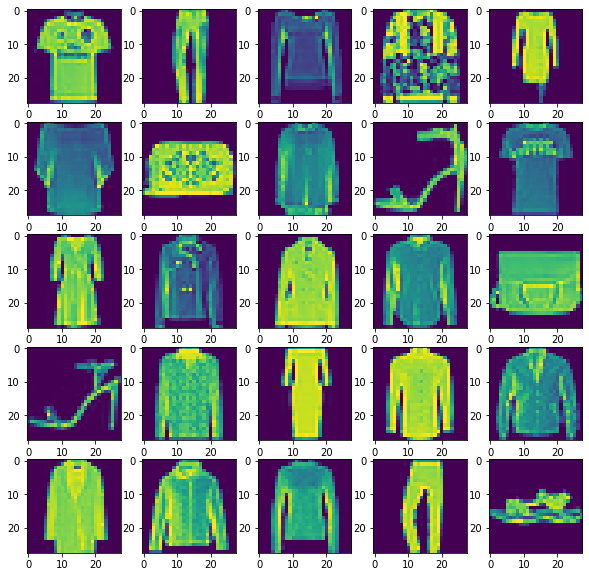

In [ ]:
plt.figure(figsize=(10,10))
for index in range(25):
    image = fmnist_test_images[index].reshape(28,28)
    plt.subplot(5,5,index+1,)
    plt.imshow(image)
plt.show() 

In [ ]:
#one hot encoding
label_temp = np.zeros((image_num,10), dtype = np.float32)
label_temp_test = np.zeros((test_num,10), dtype = np.float32)
for i in range(image_num):
    label_temp[i][fmnist_train_label[i][0]] = 1
    
train_labels_onehot = np.copy(label_temp)


print("Training labels shape:",train_labels_onehot.shape)

Training labels shape: (60000, 10)


In [ ]:
train_num = int(image_num*0.8) #train:48000
valid_num = int(image_num*0.2) #train:12000

In [ ]:
## 將train/valid分離
train_data_img = np.copy(fmnist_train_images[:train_num,:])
train_data_lab = np.copy(train_labels_onehot[:train_num,:])
valid_data_img = np.copy(fmnist_train_images[train_num:,:])
valid_data_lab = np.copy(train_labels_onehot[train_num:,:])
test_data_lab = np.copy(test_labels_onehot[:test_num,:])

train_data_img = train_data_img/255.
valid_data_img = valid_data_img/255.
test_data_img = fmnist_test_images/255.

print("Train images shape:",train_data_img.shape)
print("Train labels shape:",train_data_lab.shape)
print("Valid images shape:",valid_data_img.shape)
print("Valid labels shape:",valid_data_lab.shape)
print("Test  images shape:",test_data_img.shape)


Train images shape: (48000, 784)
Train labels shape: (48000, 10)
Valid images shape: (12000, 784)
Valid labels shape: (12000, 10)
Test  images shape: (10000, 784)


In [ ]:
### training / cross validation
train_accuracy = []
valid_accuracy = []
train_loss = []
valid_loss = []

for i in range(iteration):

    # Forward-propagation

    In1 = InnerProduct_For(train_data_img,w_1,b_1)
    Re1 = ReLu_For(In1)
    In2 = InnerProduct_For(Re1,w_out,b_out)
    soft_for = Softmax_For(In2)
    "print(soft_for)"
    print("Iter:",i)
    
    loss= loss_For(train_data_lab,soft_for)
    print ("train_loss:",loss/480)
    train_loss.append(loss/480)
    
    train_lab = np.argmax(soft_for,axis=1)
    accuracy = (train_lab == np.argmax(train_data_lab,axis=1)).sum()
    print("train_acc.",accuracy/480)
    train_accuracy.append(accuracy/480)
    
    # Bakcward-propagation

    soft_back = Softmax_Back(soft_for,train_data_lab)
    "print(soft_back)"
    dEdx_out , dEdw_out , dEdb_out = InnerProduct_Back(soft_back,Re1,w_out,b_out)
    dEdx_Re = ReLu_Back(dEdx_out,Re1)
    dEdx_1 , dEdw_1 , dEdb_1 = InnerProduct_Back(dEdx_Re,train_data_img,w_1,b_1)

    # Gradient descent

    w_1 = w_1 - eta*dEdw_1
    b_1 = b_1 - eta*dEdb_1
    w_out = w_out - eta*dEdw_out
    b_out = b_out - eta*dEdb_out

    # Do cross-validation to evaluate model

    vIn1 = InnerProduct_For(valid_data_img,w_1,b_1)
    vRe1 = ReLu_For(vIn1)
    vIn2 = InnerProduct_For(vRe1,w_out,b_out)
    vsoft_for = Softmax_For(vIn2)
    
    
    # Get 1-D Prediction array

    loss= loss_For(valid_data_lab,vsoft_for)
    print ("valid_loss:",loss/120)
    valid_loss.append(loss/120)
    vlab = np.argmax(vsoft_for,axis=1)
    
    
    
    # Compare the Prediction and validation
    #Calculate the accuracy
    accuracy = (vlab == np.argmax(valid_data_lab,axis=1)).sum()
    print("valid_acc.",accuracy/120)
    valid_accuracy.append(accuracy/120)


串流輸出內容已截斷至最後 5000 行。
Iter: 5000
train_loss: 19.487854569788677
train_acc. 86.65208333333334
valid_loss: 21.19894542896928
valid_acc. 85.325
Iter: 5001
train_loss: 19.471961168321645
train_acc. 86.60833333333333
valid_loss: 21.255123059120038
valid_acc. 85.41666666666667
Iter: 5002
train_loss: 19.489055260137242
train_acc. 86.64583333333333
valid_loss: 21.200680663730335
valid_acc. 85.31666666666666
Iter: 5003
train_loss: 19.474720703507877
train_acc. 86.60416666666667
valid_loss: 21.257633361049475
valid_acc. 85.425
Iter: 5004
train_loss: 19.490109057110228
train_acc. 86.6375
valid_loss: 21.202855734960885
valid_acc. 85.34166666666667
Iter: 5005
train_loss: 19.47797725066804
train_acc. 86.59375
valid_loss: 21.260559486787667
valid_acc. 85.45
Iter: 5006
train_loss: 19.491563002971652
train_acc. 86.62916666666666
valid_loss: 21.20526852411857
valid_acc. 85.30833333333334
Iter: 5007
train_loss: 19.481510708015573
train_acc. 86.57291666666667
valid_loss: 21.264090397989516
valid_acc. 85.45

In [ ]:
### testing
# Forward-propagation
tIn1 = InnerProduct_For(test_data_img,w_1,b_1)
tRe1 = ReLu_For(tIn1)
tIn2 = InnerProduct_For(tRe1,w_out,b_out)
tsoft_for = Softmax_For(tIn2)

In [ ]:
tpred = np.argmax(tsoft_for,axis=1)
test_accuracy  = (tpred == np.argmax(test_data_lab,axis=1)).sum()
print("test accuracy",test_accuracy/100)

test accuracy 86.06


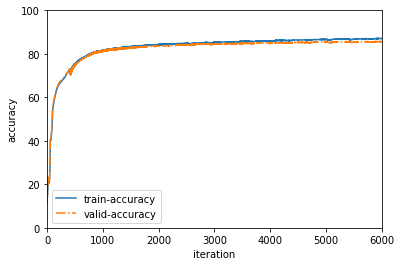

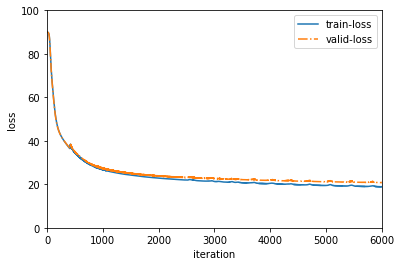

In [ ]:
valid_accuracy = np.array(valid_accuracy)
train_accuracy = np.array(train_accuracy)
plt.plot(train_accuracy, label="train-accuracy")
plt.plot(valid_accuracy, label="valid-accuracy",linestyle="-.")

y_ticks = np.linspace(0, 100, 11)
plt.legend(loc='best')
plt.xlabel('iteration')
plt.axis([0, iteration, 0, 100])
plt.ylabel('accuracy')
plt.show()

valid_loss = np.array(valid_loss)
train_loss = np.array(train_loss)
plt.plot(train_loss, label="train-loss")
plt.plot(valid_loss, label="valid-loss",linestyle="-.")

y_ticks = np.linspace(0, 100, 11)
plt.legend(loc='best')
plt.xlabel('iteration')
plt.axis([0, iteration, 0, 100])
plt.ylabel('loss')
plt.show()